# General Instructions

Reinforcement Learning Lab (part 1)

Professor : Frédéric Giroire

Done by :

  - Aqabli Souad
  - Doubali Salma
  - Giuseppe Spathis
   - Mesly Houda


# **Solving the TAXI-v3 Problem**

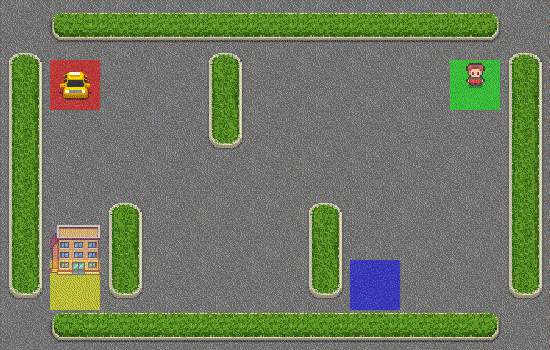

There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.


More INFO: https://gymnasium.farama.org/environments/toy_text/taxi/

### **`Installing COLAB dependencies`**

To carry out this activity we will use Gym, which is a toolkit for developing reinforcement learning algorithms.

In [1]:
!pip install gym

### **Importing dependencies**

In [2]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [4]:
gym.__version__

'0.25.2'

### **Creating the Environment and exploring the environment**

\In the next line we will call the *Taxi* environment constructor.

In [5]:
env = gym.make("Taxi-v3")

/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
# prints the state space and action space
print(env.observation_space)
print(env.action_space)

Discrete(500)
Discrete(6)


In [7]:
# prints the total number of states and actions
print(env.observation_space.n)
print(env.action_space.n)

500
6


For example, we can see the probability of the agent being in state 0 and going to the right, using `env.P`:

In [8]:
env.P[0][2]

[(1.0, 20, -1, False)]

The output we see above represents:

`(prob,next_state, reward, done)`

Where:

* `prob` is the probability of the next state happening from the current state and action pair.
* `next_state` is the next state.
* `reward` is the expected reward upon reaching this next state.
* `done` is True if the `next_state` is a terminal state and False otherwise.

## Qlearning Agent


In [9]:
epsilon = 1.0           #Greed 100%

epsilon_min = 0.005     #Minimum greed 0.05%

epsilon_decay = 0.99993 #Decay multiplied with epsilon after each episode

episodes = 50000        #Amount of games

max_steps = 100         #Maximum steps per episode

learning_rate = 0.65

gamma = 0.65

In [10]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 102.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In this section we've implemented the Bellman Equation to update the agent's knowledge based on its experience.

In [12]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

for episode in range(episodes):


    # Reset the game state, done and score before every episode/game
    state = env.reset() #Gets current game state
    done = False        #decides whether the game is over
    score = 0

    for _ in range(max_steps):

        # With the probability of (1 - epsilon) take the best action in our Q-table
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Else take a random action
        else:
            action = env.action_space.sample()

        # Step the game forward
        next_state, reward, done, _ = env.step(action)

        #TO DO: Update Q-table
        # Calculation for the updated Q-value using the Bellman Equation
        best_next_action = np.max(qtable[next_state, :])

        qtable[state, action] = (1 - learning_rate) * qtable[state, action] + \
                                learning_rate * (reward + gamma * best_next_action)

        # Move to the next state
        state = next_state


        if done:
            break

    # Reducing our epsilon each episode (Exploration-Exploitation trade-off)
    if epsilon >= epsilon_min:
        epsilon *= epsilon_decay

##Random Agent Comparison Section

This section creates a Baseline Agent that does not learn or remember anything, used to prove that Q-Learning is effective.

In [14]:
# --- RANDOM AGENT COMPARISON ---
random_episodes = 1000
random_rewards = []

for episode in range(random_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    for _ in range(max_steps):
        action = env.action_space.sample()
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state
        if done:
            break

    random_rewards.append(total_reward)

print("Average reward for Random Agent:", np.mean(random_rewards))


# --- Q-AGENT EVALUATION (greedy) ---
eval_episodes = 1000
q_rewards = []

for ep in range(eval_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    for _ in range(max_steps):
        action = int(np.argmax(qtable[state, :]))  # greedy
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

        if done:
            break

    q_rewards.append(total_reward)

print("Average reward for Q-Agent (greedy eval):", np.mean(q_rewards))

Average reward for Random Agent: -387.687
Average reward for Q-Agent (greedy eval): 7.913


##Comparing with a random agent
The Q-Agent selects actions with np.argmax(qtable[state, :]), exploiting what it learned during training to reach the passenger, pick them up, reach the destination, and drop them off efficiently.

The Random Agent uses env.action_space.sample() at every step, so it wastes many moves and often performs illegal pickup/dropoff actions, accumulating large negative rewards.

## **References**


> Sutton, Richard S., and Andrew G. Barto. Reinforcement learning: An introduction. MIT press, 2018.



> Ravichandiran, Sudharsan. Hands-on reinforcement learning with Python: master reinforcement and deep reinforcement learning using OpenAI gym and tensorFlow. Packt Publishing Ltd, 2018.



> Lapan, Maxim. Deep reinforcement learning hands-on. Packt publishing, 2020.


> Udacity : Deep Reinforcement Learning Nanodegree program

> Thomas Simonini : Deep RL Course

